In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import sys

# Add path to the parent directory to import modules
sys.path.append('../..')
from src.models.classification.perceptron import Perceptron

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(21, 2)
(21, 1)


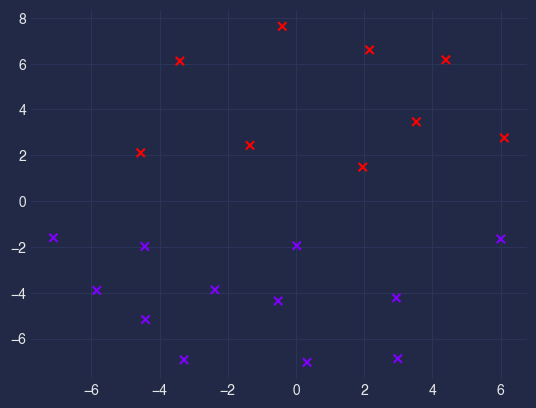

In [10]:
dataset_file_path = '../../data/classification/classification_separable.csv'
data = np.genfromtxt(dataset_file_path, delimiter=',', skip_header=1)
X = data[:, :-1]
y = data[:, -1].reshape(-1,1)
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y[:,0], marker='x', cmap='rainbow')


2
[-2.60887097 11.91991342]
[-3.]


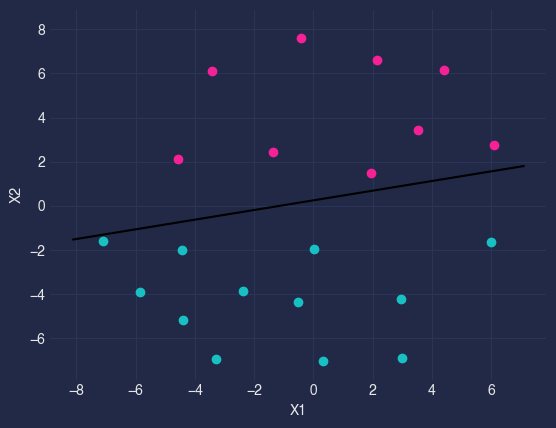

In [11]:
classifier = Perceptron()
classifier = classifier.fit(X,y, 10, visualize=True)
print(classifier.last_iteration)
print(classifier.w)
print(classifier.b)

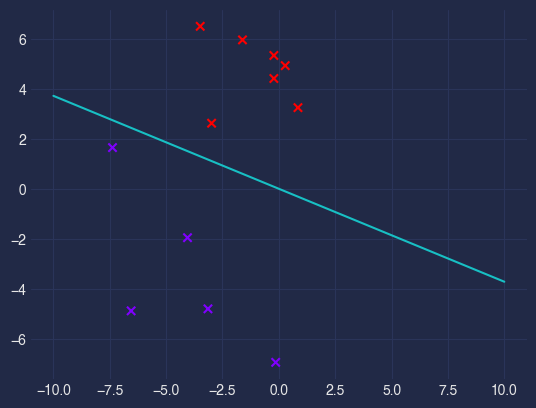

In [12]:
w = classifier.w
b = classifier.b

xs = np.linspace(-10,10,100)
ys = -w[0]/w[1] * xs -b/w[1]

plt.plot(xs, ys, label='Decision Boundary')
plt.scatter(X[:,0], X[:,1], c=y[:,0], marker='x', cmap='rainbow')

plt.show()

In [13]:
def plot_scatter_with_decision_boundary(X, y, normal_vector, bias):
    # Scatter plot of points in X with labels y
    for label in np.unique(y):
        plt.scatter(X[y.ravel() == label, 0], X[y.ravel() == label, 1], label=f'Label {label}')
    
    # Equation of decision boundary line: normal_vector[0]*x + normal_vector[1]*y + bias = 0
    # Solve for y to get y = (-normal_vector[0]*x - bias) / normal_vector[1]
    x_values = np.linspace(X[:, 0].min() -1, X[:, 0].max() +1, 100)
    y_values = (-normal_vector[0]*x_values - bias) / normal_vector[1]
    plt.plot(x_values, y_values, '-k', label='Decision Boundary')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

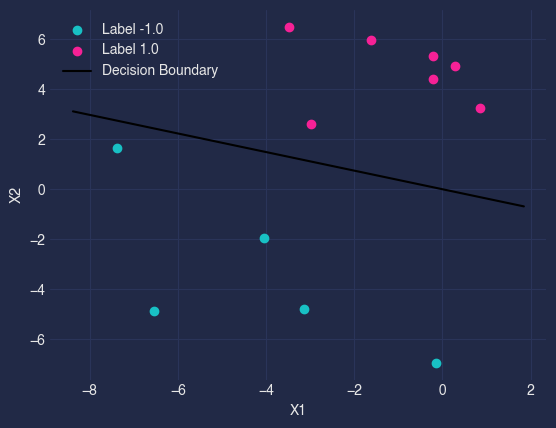

In [14]:
plot_scatter_with_decision_boundary(X,y,w,b)

In [ ]:
X.shape